## Linear Predictions
### Predicting weight from height 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We use a publicly available dataset of a range of weights and heights for 25,000 individuals who were at age 18 at the time of measurement.



In [2]:
df=pd.read_csv("SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


Unfortunately, this dataset was assembled in the US thus the weights are in pounds and the heights are in inches. Thus, our first step after loading the dataset is to convert the units to kg and cm. 

In [3]:
df["Height(cm)"]=df["Height(Inches)"]*2.54
df["Weight(kg)"]=df["Weight(Pounds)"]*0.453592

df

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(kg)
0,1,65.78331,112.9925,167.089607,51.252494
1,2,71.51521,136.4873,181.648633,61.909547
2,3,69.39874,153.0269,176.272800,69.411778
3,4,68.21660,142.3354,173.270164,64.562199
4,5,67.78781,144.2971,172.181037,65.452010
...,...,...,...,...,...
24995,24996,69.50215,118.0312,176.535461,53.538008
24996,24997,64.54826,120.1932,163.952580,54.518674
24997,24998,64.69855,118.2655,164.334317,53.644285
24998,24999,67.52918,132.2682,171.524117,59.995797


## Looking at the data 


In [4]:
X = df.iloc[:,3:4]  
X

,Height(cm)
0,167.089607
1,181.648633
2,176.272800
3,173.270164
4,172.181037
...,...
24995,176.535461
24996,163.952580
24997,164.334317
24998,171.524117


In [5]:
y = df.iloc[:,4:5]
y

,Weight(kg)
0,51.252494
1,61.909547
2,69.411778
3,64.562199
4,65.452010
...,...
24995,53.538008
24996,54.518674
24997,53.644285
24998,59.995797


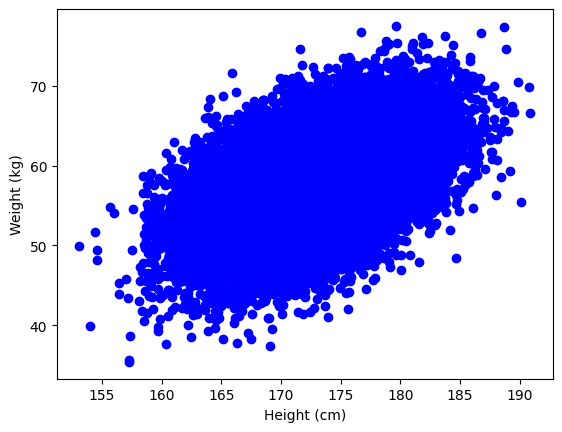

In [6]:
plt.scatter(X,y,color='blue')
plt.title("")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

## Building and evaluating a linear model 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=500,random_state = 0)


In [8]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_train)

## Looking at the fit 

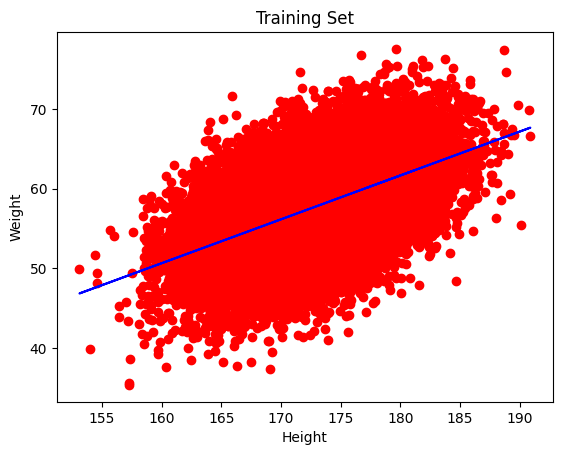

In [9]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('Training Set')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Prediction on the test set

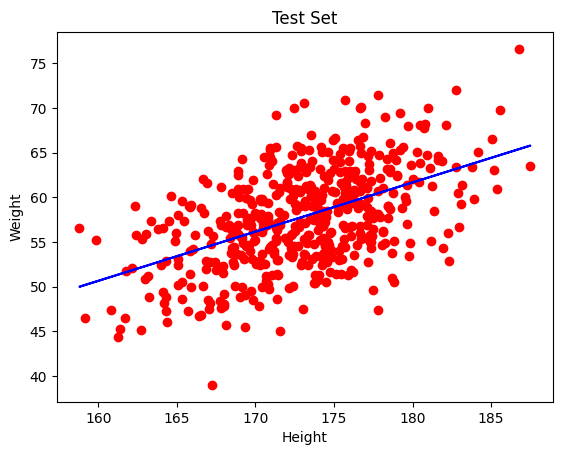

In [10]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test, regressor.predict(X_test),color='blue')
plt.title('Test Set')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### How good is the prediction? 



       Weight(kg)
14149    4.962736
8946     3.475265
22378   -5.891231
12162   -2.754534
4879    -5.038872
...           ...
21385   -3.993327
14296    3.171048
14185    3.612755
2134    11.048948
8006    -1.272491

[500 rows x 1 columns]


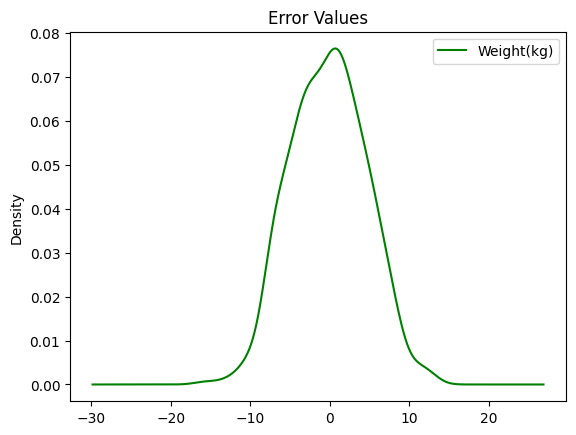

In [11]:
errors = y_test - regressor.predict(X_test)

print(errors)

errors.plot.density(color='green')
plt.title('Error Values')
plt.show()



In [12]:
abserrors = np.abs(errors)


abserrors

,Weight(kg)
14149,4.962736
8946,3.475265
22378,5.891231
12162,2.754534
4879,5.038872
...,...
21385,3.993327
14296,3.171048
14185,3.612755
2134,11.048948


In [13]:
abserrors.mean()

Weight(kg)    3.849421
dtype: float64

### Can a different type of model give a better prediction? 



/Users/hastingj/Work/jannahastings.github.io/projects/projects/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


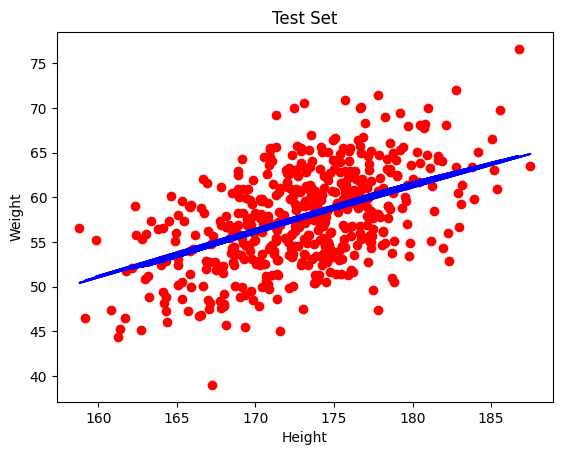

In [14]:
#from sklearn.linear_model import Perceptron
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)


plt.scatter(X_test,y_test,color='red')
plt.plot(X_test, regr.predict(X_test),color='blue')
plt.title('Test Set')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

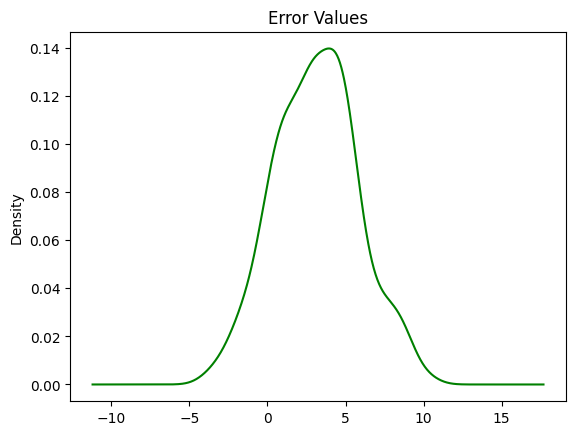

In [15]:
errors2 = y_test.values - regr.predict(X_test)
errors2 = errors2[0]

pd.Series(errors2).plot.density(color='green')
plt.title('Error Values')
plt.show()

        linear       SVM
0     4.962736  4.977328
1     3.475265 -0.004781
2    -5.891231  4.458022
3    -2.754534  4.579559
4    -5.038872  8.981566
..         ...       ...
495  -3.993327  6.884031
496   3.171048  1.154064
497   3.612755  4.030679
498  11.048948  0.295847
499  -1.272491  5.034798

[500 rows x 2 columns]


<Axes: >

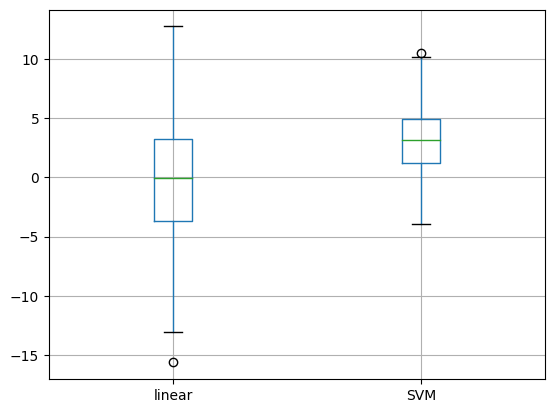

In [16]:
#abserrors2 = np.abs(errors2)

linearerrors  = [item for sublist in errors.values for item in sublist]

#linearerrors
svmerrors = list(errors2)

svmerrors

dferrors = pd.DataFrame({"linear":linearerrors,"SVM":svmerrors})

print(dferrors)

dferrors.boxplot()



<Axes: >

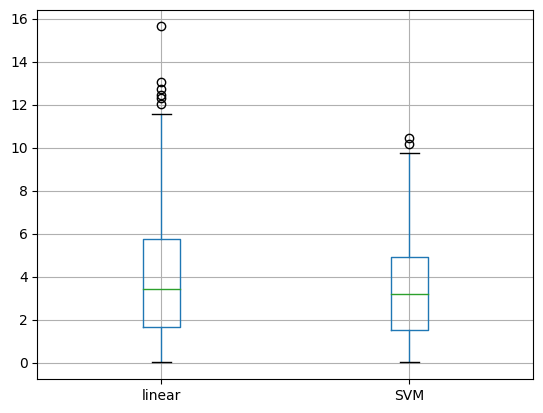

In [17]:
dfabserrors = dferrors.abs()

dfabserrors.boxplot()

In [18]:
dfabserrors.mean()

linear    3.849421
SVM       3.415586
dtype: float64